In [1]:
import datetime as dt
import os

import numpy as np

from coropy import viz

In [2]:
# data
DATA_PATH = os.path.join(os.pardir, 'data')
COUNTRY = 'CRO'
DATA = os.path.join(DATA_PATH, COUNTRY)
CONFIRMED_CASES_PATH = os.path.join(DATA_PATH, COUNTRY, 'confirmed_cases.dat')
RECOVERED_CASES_PATH = os.path.join(DATA_PATH, COUNTRY, 'recovered_cases.dat')
DEATH_CASES_PATH = os.path.join(DATA_PATH, COUNTRY, 'death_cases.dat')
TESTS_PATH = os.path.join(DATA_PATH, COUNTRY, 'tests.dat')

confirmed_cases = np.loadtxt(CONFIRMED_CASES_PATH)
recovered_cases = np.loadtxt(RECOVERED_CASES_PATH)
death_cases = np.loadtxt(DEATH_CASES_PATH)
daily_tests = np.loadtxt(TESTS_PATH)

# 1st wave
epidemics_start_date = dt.datetime(2020, 2, 26)

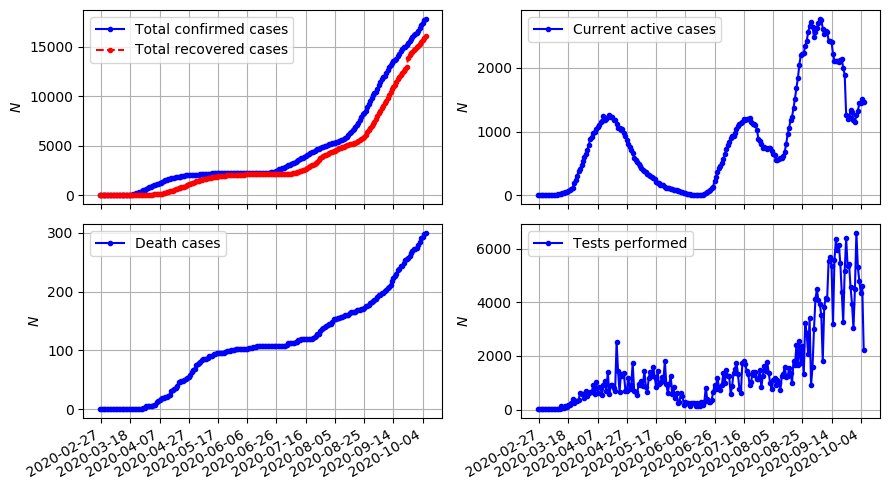

In [3]:
viz.plot_data(epidemics_start_date, confirmed_cases, recovered_cases, death_cases, daily_tests=daily_tests, paper_config=False)

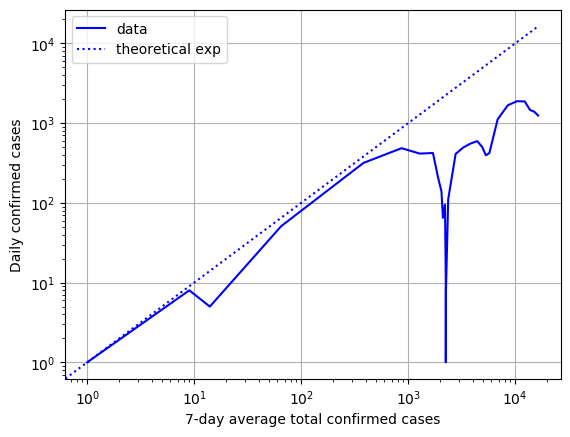

In [4]:
viz.avg_new_cases_over_total_cases(confirmed_cases, paper_config=False)